## imports

In [1]:
%matplotlib inline
# core
import numpy as np
import pandas as pd
import scipy.stats
# visualization
import matplotlib.pyplot as plt 
import seaborn as sns # seaborn is now installed by default. https://docs.anaconda.com/anaconda/release-notes#id10

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

from sklearn import neighbors

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier # It is called ENSEMBLE method since we are using more than one classifier.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

df=pd.read_csv("train.csv")


C:\Users\Edan\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def show_scatter(col,y,title):
    plt.scatter(col, lables2floats(y), c=lables2floats(y), s=30, cmap = "bwr")
    plt.title(title)
    plt.xlabel('values')
    plt.scatter(col,[0.5]*len(col),c = lables2floats(y),s=500,alpha=0.05, cmap = "bwr")
    plt.yticks([])
    plt.ylim(-0.05, 1.05)
    plt.show()

## Preprocessing
Drop all records which doesn't belong to the 2 biggest classes

In [3]:
def find_largest_classes(df): 
    # return the name of the most commen targets
    df2=df.groupby("target").size()
    num_of_colms=list(df2.sort_values()[-2:].keys())
    return num_of_colms

def filter_classes(df):
    # return the data frame only with the common classes
    num_of_classes=find_largest_classes(df)
    print num_of_classes[0]
    df2=df[(df.target==num_of_classes[0]) | (df.target==num_of_classes[1])]
    return df2

def lables2floats(y):
    # maps: Class_2 => 0, Class_6 => 1 needed for colormaps which accept floats 
    d = {'Class_2':0.0,'Class_6':1.0}
    return np.array([d[i] for i in y])

In [4]:
filtered_data = filter_classes(df)
data = filtered_data
grouped = data.groupby('target')
X,y = data[data.columns[:-1]],data[data.columns[-1]]

Class_6


## data visualization

In [5]:
grouped.describe(include = 'all')

feat_12       feat_20       feat_21       feat_23  \
target                                                                  
Class_2 count  12059.000000  12059.000000  12059.000000  12059.000000   
        mean       0.091716      0.126710      0.169085      0.028609   
        std        0.337387      0.466171      0.569606      0.238716   
        min        0.000000      0.000000      0.000000      0.000000   
        25%        0.000000      0.000000      0.000000      0.000000   
        50%        0.000000      0.000000      0.000000      0.000000   
        75%        0.000000      0.000000      0.000000      0.000000   
        max        5.000000      9.000000      8.000000      6.000000   
Class_6 count  10660.000000  10660.000000  10660.000000  10660.000000   
        mean       0.171482      0.345497      0.461069      0.137711   
        std        0.540553      0.904406      1.074871      0.627559   
        min        0.000000      0.000000      0.000000      0.000000   
        25%        0.000000      0.000000      0.000000      0.000000   
        50%        0.000000      0.000000      0.000000      0.000000   
        75%        0.000000      0.000000      0.000000      0.000000   
        max       12.000000     13.000000     13.000000     15.000000   

                    feat_51       feat_56       feat_61       feat_69  \
target                                                                  
Class_2 count  12059.000000  12059.000000  12059.000000  12059.000000   
        mean       0.002239      0.118915      0.012190      0.056555   
        std        0.059675      0.933050      0.131089      0.363064   
        min        0.000000      0.000000      0.000000      0.000000   
        25%        0.000000      0.000000      0.000000      0.000000   
        50%        0.000000      0.000000      0.000000      0.000000   
        75%        0.000000      0.000000      0.000000      0.000000   
        max        3.000000     42.000000      3.000000     17.000000   
Class_6 count  10660.000000  10660.000000  10660.000000  10660.000000   
        mean       0.122420      0.243152      0.956473      0.183583   
        std        0.848570      0.740943      1.884253      0.771583   
        min        0.000000      0.000000      0.000000      0.000000   
        25%        0.000000      0.000000      0.000000      0.000000   
        50%        0.000000      0.000000      0.000000      0.000000   
        75%        0.000000      0.000000      1.000000      0.000000   
        max       44.000000     20.000000     33.000000     21.000000   

                     feat_7       feat_70  
target                                     
Class_2 count  12059.000000  12059.000000  
        mean       0.020483      0.762584  
        std        0.177976      1.719298  
        min        0.000000      0.000000  
        25%        0.000000      0.000000  
        50%        0.000000      0.000000  
        75%        0.000000      1.000000  
        max        9.000000     32.000000  
Class_6 count  10660.000000  10660.000000  
        mean       0.114728      0.584240  
        std        0.448145      1.358014  
        min        0.000000      0.000000  
        25%        0.000000      0.000000  
        50%        0.000000      0.000000  
        75%        0.000000      1.000000  
        max        9.000000     25.000000

### scatter of features

To visualize the scatter of the features we created the following plot.
This plot represents 2 characteristics of each feature simultaneously:
1. Class - by it's color
2. Density - the more transparent the less samples taken from this region. the small dots helps to see the transparent samples.
These characteristics helps to find Regions Of Interest (ROI), the purer - the better!

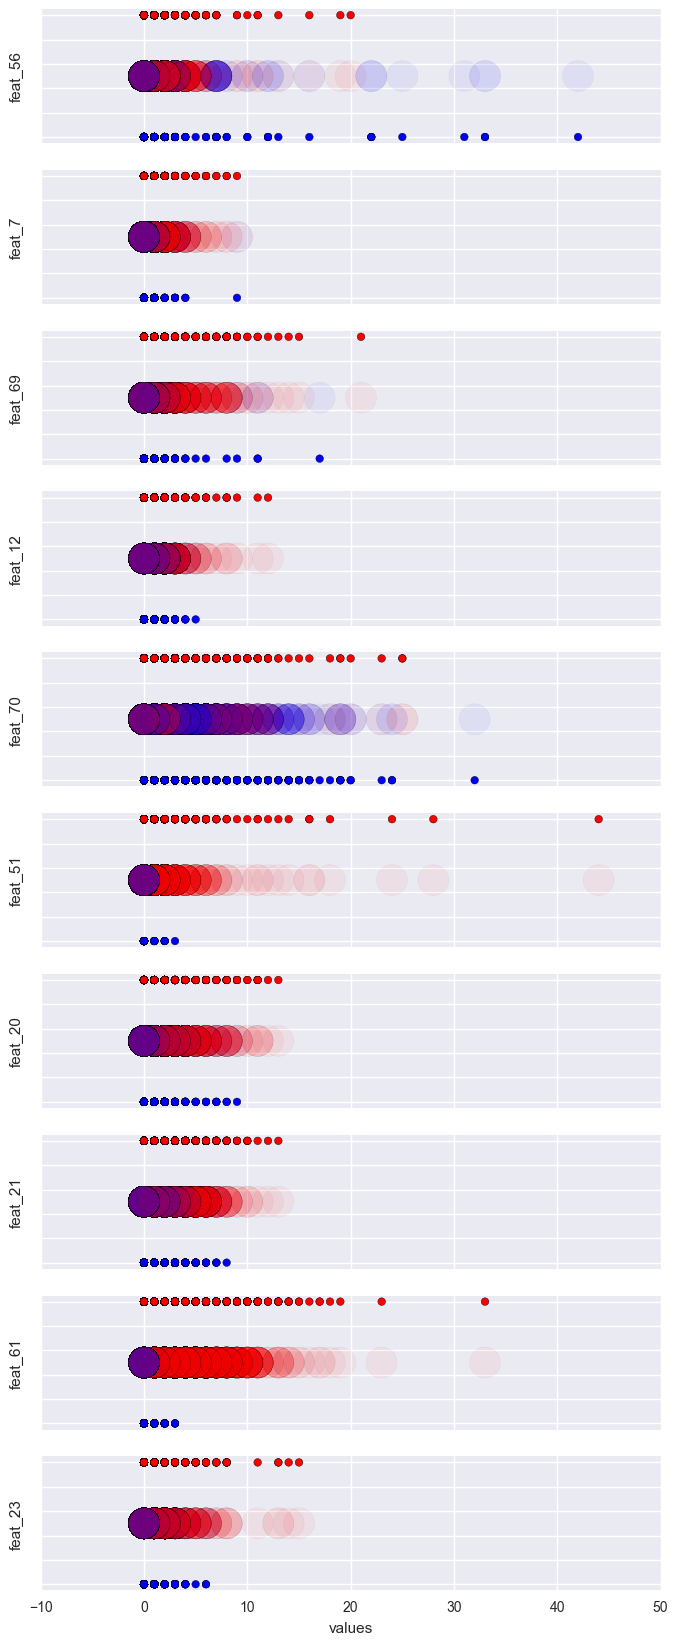

In [6]:
f, axarr = plt.subplots(10, sharex=True) 
tmp = 0
for feature in X:
    axarr[tmp].scatter(data[feature], lables2floats(y), c=lables2floats(y), s=30, cmap = "bwr")
    axarr[tmp].scatter(data[feature],[0.5]*len(data),c = lables2floats(y),s=500,alpha=0.05, cmap = "bwr")
    axarr[tmp].set_yticklabels([]) # clear y-axis because it meanningless 
    axarr[tmp].set_ylabel(feature) # set y-label to relevant feature
    axarr[tmp].set_ylim(-0.05, 1.05) # to place the small dots near the border 
    tmp+=1
    
plt.xlabel('values')
plt.subplots_adjust(top = 3)
plt.show()

### correlation of features

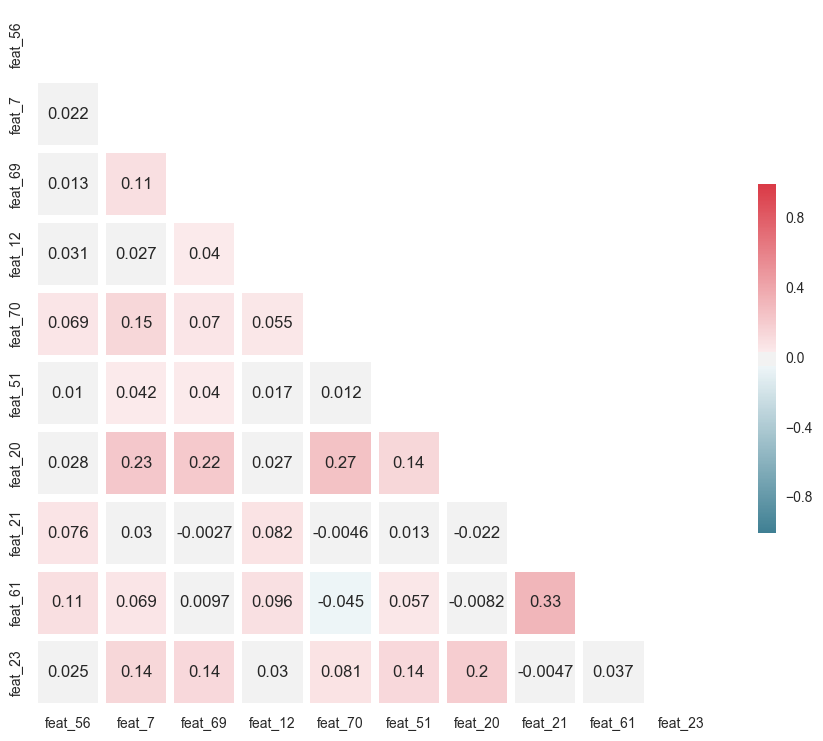

In [7]:
sns.set(style="white")
corr = X.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, linewidths=5, cbar_kws={"shrink": 0.5})

for better understanding of the correlation we are using violinplot. At first it may look confusing but this plot contain a lot of information about the relation between diffrent features. The dot in the heart of the violin is the mean correlation of the given feature.

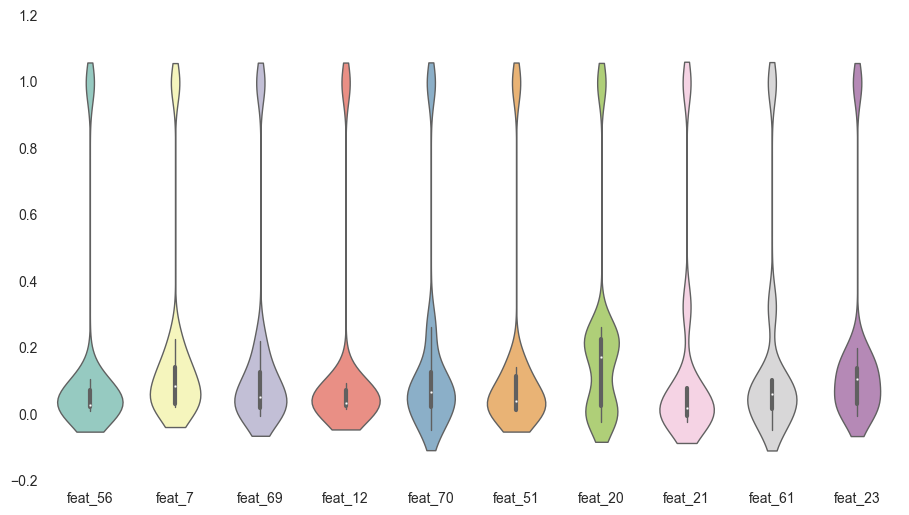

In [8]:
 
sns.set(style="white")
corr = X.corr()
corr_df = X.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
sns.despine(left=True, bottom=True)

## Feature generation

Let's use our observations on the features to engineer a powerful feature. 
We will use PCA and LDA later, so now we will focus on nonlinear combinations of features that cannot be generated with these methods.
Our scatter plots reveals that feature 51 and 61 have potential to be powerful together because they both have many dense "blue" points near zero, bounded on 3 and have relatively small correlation. So taking the maximum looks promising. 

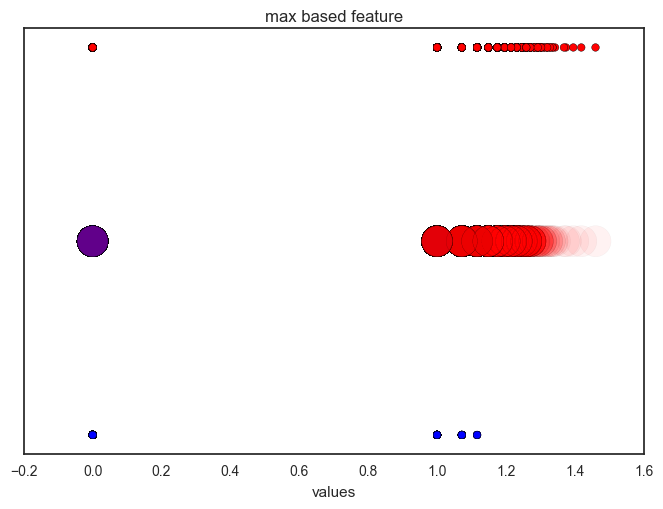

In [9]:
max_col = data[["feat_51", "feat_61"]].max(axis=1)**0.1
show_scatter(max_col,y,"max based feature")

## Explorer Dimensionally Reduction

### LDA

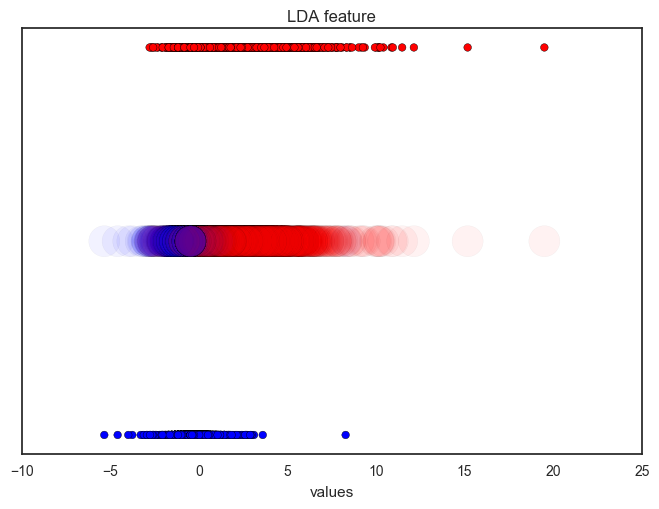

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(n_components=2)
LDA.fit(X, y)
reduced_data = LDA.transform(X)
show_scatter(reduced_data[:, :],y,"LDA feature")


### PCA

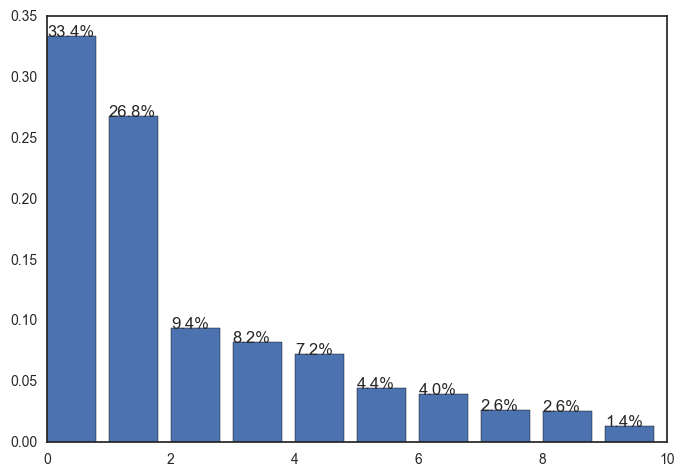

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_r = pca.fit(X).transform(X)
plt.bar(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
for a,b in zip(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_):
    plt.text(a, b, str(np.round(b,3)*100)+"%")
plt.show()

In [62]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

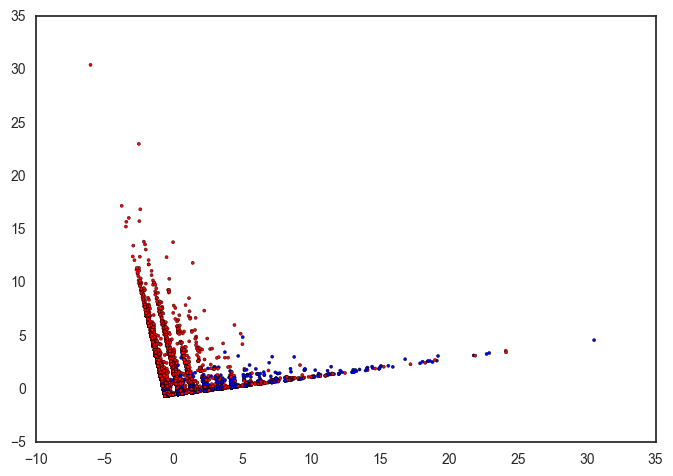

In [63]:
plt.scatter(X_r[:,0], X_r[:,1], s= 5, c=lables2floats(y), cmap = "bwr")
plt.show()

#### Pca after rotation

In [64]:
theta = np.radians(11)
c, s = np.cos(theta), np.sin(theta)
R = np.matrix('{} {}; {} {}'.format(c, -s, s, c))
X_r2 = np.array(X_r * R)


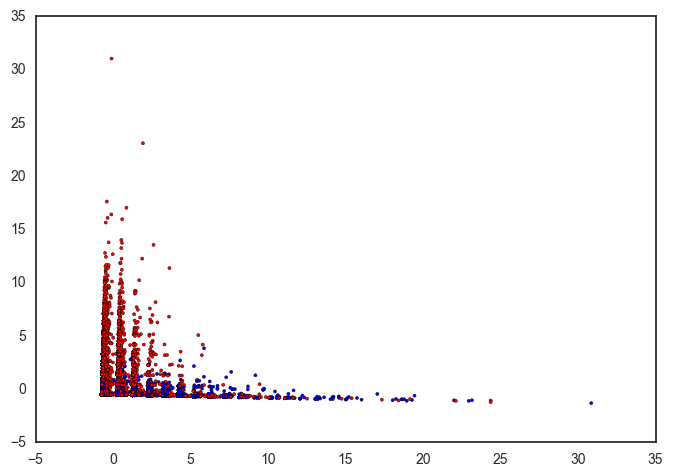

In [65]:
plt.scatter(X_r2[:,0], X_r2[:,1], s= 5, c=lables2floats(y), cmap = "bwr")
plt.show()

# K-Nearest Neighbour with All combinations

In [16]:
def knn(relevent_X): 
    X_train, X_test, y_train, y_test = train_test_split(relevent_X, y, test_size=0.33, random_state=42)
    # creating odd list of K for KNN
    myList = list(range(1,50)) 
    # subsetting just the odd ones
    neighbors = filter(lambda x: x % 2 == 0, myList)

    # empty list that will hold cv scores
    cv_scores = []

    # we will use k-fold cross validation and will perform 10-fold cross validation
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k) #calculate knn for k neighbors
        scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')#list of acores for each folder with the relevn
        cv_scores.append(scores.mean())
    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]
    # determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]
    from sklearn import neighbors, datasets
    clf = neighbors.KNeighborsClassifier(n_neighbors=optimal_k, 
                                         weights="uniform",
                                        metric="euclidean",
                                        algorithm= "brute")
    clf.fit(relevent_X, y)
    return clf.score(relevent_X, y, sample_weight=None)



In [17]:
def Knn_with_plot_for_best_combination(relevent_X):
    X_train, X_test, y_train, y_test = train_test_split(relevent_X, y, test_size=0.33, random_state=42)
    # creating odd list of K for KNN
    myList = list(range(1,50)) 
    # subsetting just the odd ones
    neighbors = filter(lambda x: x % 2 == 0, myList)

    # empty list that will hold cv scores
    cv_scores = []

    # we will use k-fold cross validation and will perform 10-fold cross validation
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k) #calculate knn for k neighbors
        scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')#list of acores for each folder with the relevn
        cv_scores.append(scores.mean())
    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]
    # determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]

 

    # plot misclassification error vs k
    
    plt.plot(neighbors, MSE)
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()
    print "The optimal number of neighbors is %d" % optimal_k   

In [18]:
LDA_PCA=np.concatenate((reduced_data, X_r), axis=1)
LDA_and_all_data=np.concatenate((reduced_data, X), axis=1)
PCA_and_all_data=np.concatenate((X_r, X), axis=1)
LDA_PCA_and_all_data=np.concatenate((PCA_and_all_data, reduced_data), axis=1)
print LDA_and_all_data.shape
print PCA_and_all_data.shape
print LDA_PCA_and_all_data.shape

(22719L, 11L)
(22719L, 12L)
(22719L, 13L)


In [19]:
combination_lst=[X,X_r,reduced_data,LDA_PCA,LDA_and_all_data,PCA_and_all_data,LDA_PCA_and_all_data]
combination_lst_names=['All data','Only Pca','Only LDA','LDA and PCA','LDA and all_data','PCA and all data','LDA, PCA and all data']

In [20]:
combination_lst=[X,X_r]
combination_lst_names=['All data','Only Pca']

In [21]:
def Best_combination(combination_lst): 
    max_score=0
    max_index=0
    n=len(combination_lst)
    scores_lst=[]
    for i in range (n):
        score_i=knn(combination_lst[i])
        scores_lst.append(score_i)
        if score_i>max_score:
            max_score=score_i
            max_index=i
    return max_index,scores_lst
            
        

In [22]:
max_index,scores_lst= Best_combination(combination_lst)
print scores_lst
print max_index


[0.74668779435714605, 0.73924908666754696]
0


In [23]:
for i in range(len(scores_lst)):
    print "The score for "+combination_lst_names[i]+" with optimal K is: "+str(scores_lst[i])
print "We get the meximun score when we use knn with data that include "+combination_lst_names[max_index] + ". The ocore that we get in that case is "+ str(scores_lst[max_index])


The score for All data with optimal K is: 0.746687794357
The score for Only Pca with optimal K is: 0.739249086668
We get the meximun score when we use knn with data that include All data. The ocore that we get in that case is 0.746687794357


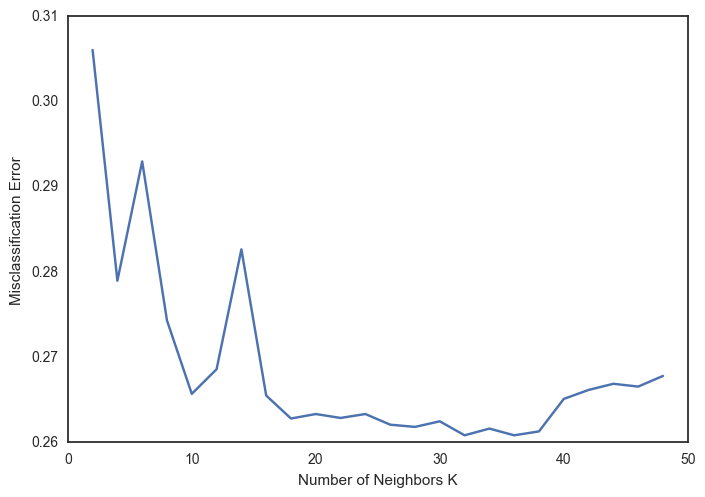

The optimal number of neighbors is 32


In [24]:
Knn_with_plot_for_best_combination(combination_lst[max_index])

## scores the missclassification error for pure KNeighborsClassifier

In [25]:
neighbors = filter(lambda x: x % 2 == 0, myList)
from sklearn.metrics import accuracy_score
cv_scores_for_test = []
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    cv_scores_for_test.append(accuracy_score(y_test, knn.predict(X_test)))
    
MSE_test = [1 - x for x in cv_scores_for_test]



NameError: name 'myList' is not defined

In [ ]:

# for [:2] features
# perform 10-fold cross validation
cv_scores_for_test_0_2 = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[:,:3], y_train)
    cv_scores_for_test_0_2.append(accuracy_score(y_test, knn.predict(X_test[:,:3])))
    
MSE_test_0_2 = [1 - x for x in cv_scores_for_test_0_2]

In [ ]:
# for [2:4] features
# perform 10-fold cross validation
cv_scores_for_test_3_5 = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[:,3:6], y_train)
    cv_scores_for_test_3_5.append(accuracy_score(y_test, knn.predict(X_test[:,3:6])))
    
MSE_test_3_5 = [1 - x for x in cv_scores_for_test_3_5]

In [ ]:
# for [2:4] features
# perform 10-fold cross validation
cv_scores_for_test_6_9 = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[:,6:], y_train)
    cv_scores_for_test_6_9.append(accuracy_score(y_test, knn.predict(X_test[:,6:])))
    
MSE_test_6_9 = [1 - x for x in cv_scores_for_test_6_9]

In [ ]:
# plot miscllassification error vs k
plt.clf()
plt.plot(neighbors, MSE, label='k-fold')
plt.plot(neighbors, MSE_test, label='whole dataset and features')
plt.plot(neighbors, MSE_test_0_2, label='features [:2]')
plt.plot(neighbors, MSE_test_3_5, label='features [3:5]')
plt.plot(neighbors, MSE_test_6_9, label='features [6:9]')
plt.xlabel('number of neighbors K')
plt.ylabel('misclassification error')
plt.legend()
plt.show()

## Naive

In [27]:
##add here the relvent graph

In [28]:
def Naive_relevent_data(relevent_X): 
    #X_without_correlated = X.drop(relevent_X.corr().abs().sum().argxmax(), 1)
    X_train, X_test, y_train, y_test = train_test_split(relevent_X, y, test_size=0.33, random_state=42)
    clf = GaussianNB()
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')#list of scores for each folder with the relevn

    # changing to misclassification error
    MSE = [1 - x for x in scores]
    return np.mean(MSE)

In [29]:
def Best_combination_Naive(combination_lst): 
    max_score=0
    max_index=0
    n=len(combination_lst)
    for i in range (n):
        score_i=Naive_relevent_data(combination_lst[i])
        if score_i>max_score:
            max_score=score_i
            max_index=i
    return combination_lst_names[max_index],(1-max_score)*100
    

In [30]:
print Best_combination_Naive(combination_lst)

('Only Pca', 68.037593517876999)


### Neural network

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [42]:
clf = MLPClassifier(#-----The architecture:------#
                    activation="tanh", #What is the activation function between neurons {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}?
                    hidden_layer_sizes= (50,100,20),  #What is the architecture? what happens if we add more layers?
                    alpha = 0.0001, #The regularization: loss + alpha*W^2
                    batch_size = "auto",#when set to auto,batch zise= min(200,n_samples)
                    #-----The optimizer:------#
                    solver = "sgd", #Stochastic Gradient Descent, other optimizers are out of the scope of the course.
                    learning_rate = "adaptive", #How does the learning rate update itself? {‘constant’, ‘invscaling’, ‘adaptive’}
                    learning_rate_init = 0.5, #What is the initial learning rate? in some optimizers the learning rate changes.
                    power_t = 0.5, #When we choose learning rate to be invscaling, it means that we multiply this number each epoch.
                    momentum = 0.9, #Whats the fraction of the updated dedicated to the momentum? the "friction".
                    nesterovs_momentum = False, #Out of the scope of the course, leave false.
                    early_stopping = False, #Do we set a validation data aside?
                    tol = 1e-4, #A broad concept of converges, when we can say the algorithm converged?
                    warm_start = True, #if we fit at the second time, do we start from the last fit?
                    max_iter = 15)

In [43]:
clf.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 100, 20), learning_rate='adaptive',
       learning_rate_init=0.5, max_iter=15, momentum=0.9,
       nesterovs_momentum=False, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=True)

In [44]:
print clf.score(X_test, y_test)

0.754753521127


DONE!


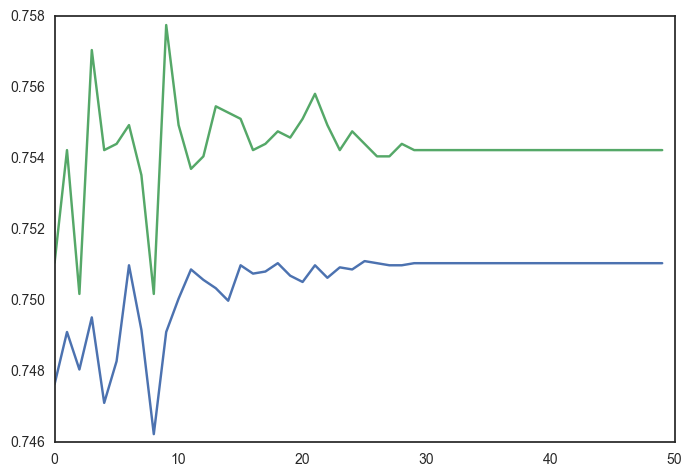

In [45]:
score_train = []
score_test = []
for i in range(50):
    clf.fit(X_train, y_train)
    score_test.append(clf.score(X_test, y_test))
    score_train.append(clf.score(X_train, y_train))
        
        
print "DONE!"

plt.plot(score_train)
plt.plot(score_test)
plt.show()

### Foreast Classifier

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_r, lables2floats(y),test_size=0.33,random_state=42)

In [56]:
bdt = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(min_samples_split=5,max_depth=5), n_estimators=1000,algorithm = "SAMME") # 
#bdt = AdaBoostClassifier(base_estimator= GaussianNB(), n_estimators=2000,algorithm = "SAMME")
bdt.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=1000, random_state=None)

In [57]:
bdt.estimators_[0] #<Example of one of the 200 estimators, this estimator is already fitted and can be plotted/

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1638546554, splitter='best')

The weights of each estimator


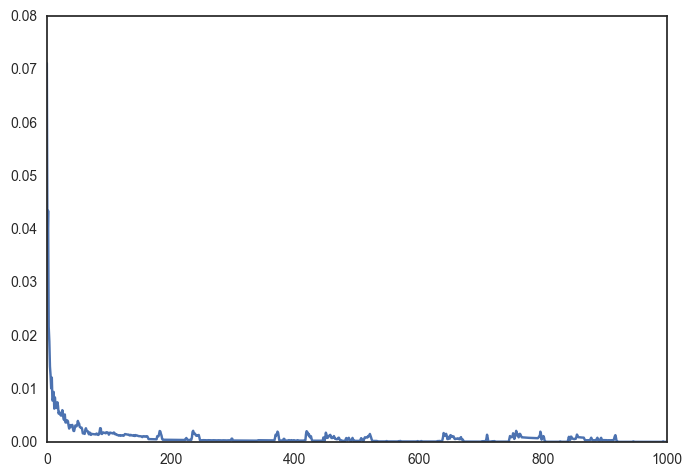

In [58]:
weights = bdt.estimator_weights_ #<---- the weights of each DT classifier

print "The weights of each estimator"
plt.plot(weights/np.sum(weights))
plt.show()

In [79]:
def plot_decision_bounderies(stage,X_r):
    plot_step = 0.1
    
    plt.figure(figsize=(10, 10))
    
    x_min, x_max = X_r[:, 0].min() - 1, X_r[:, 0].max() + 1
    y_min, y_max = X_r[:, 1].min() - 1, X_r[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    # If we don't give a stage parameter, the computer will plot the decision boundaries of the ensemble.
    if stage==None:
        Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])


    #Given a specific stage, the decision boundaries that will be shown are the boundaries of the estimatior No. stage.
    else:
        Z= bdt.estimators_[stage].predict(np.c_[xx.ravel(), yy.ravel()])
        
    Z =Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z,cmap="seismic") #Plotting the decision boundaries of the base estimator at stage i/the boosted, 

    plt.scatter(X_r[:,0], X_r[:,1], c=lables2floats(y),s=1.6, cmap = "bwr")
    
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.title('Decision Boundary')
        
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.35)
    plt.show()

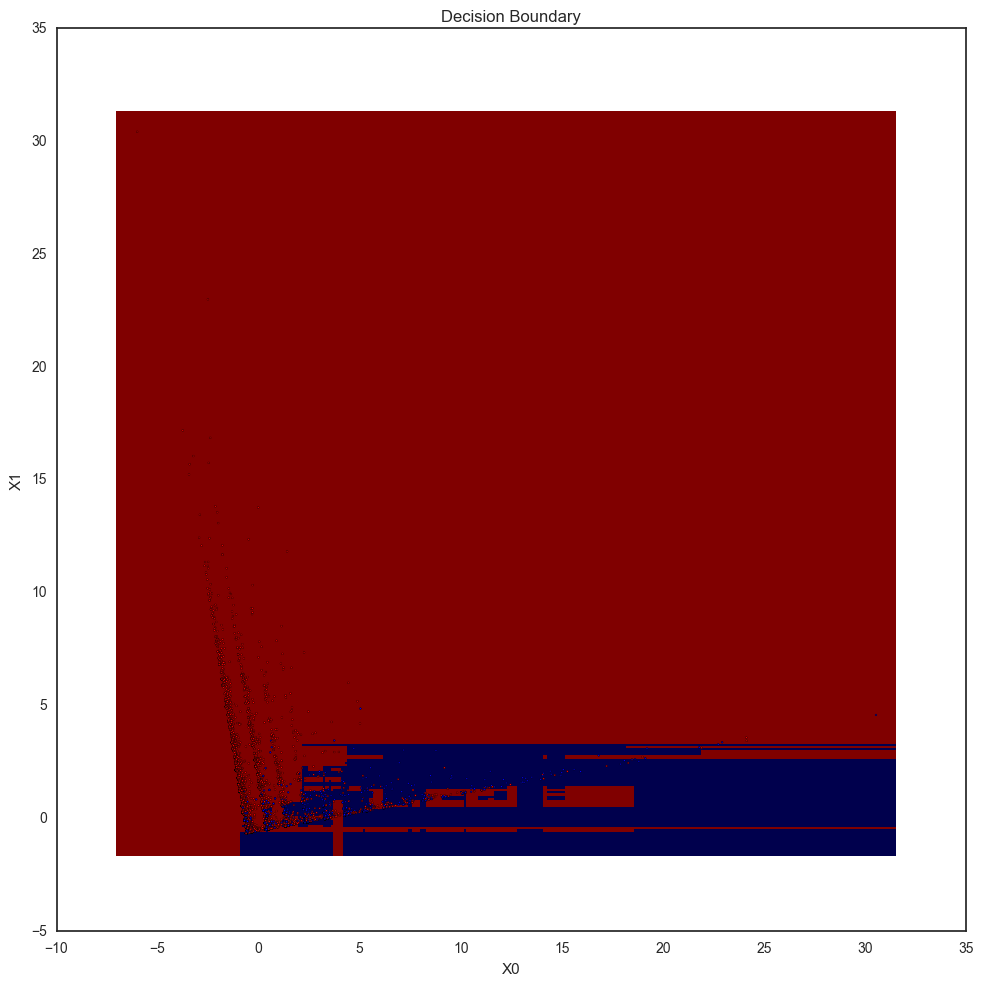

In [80]:
plot_decision_bounderies(None,X_r)

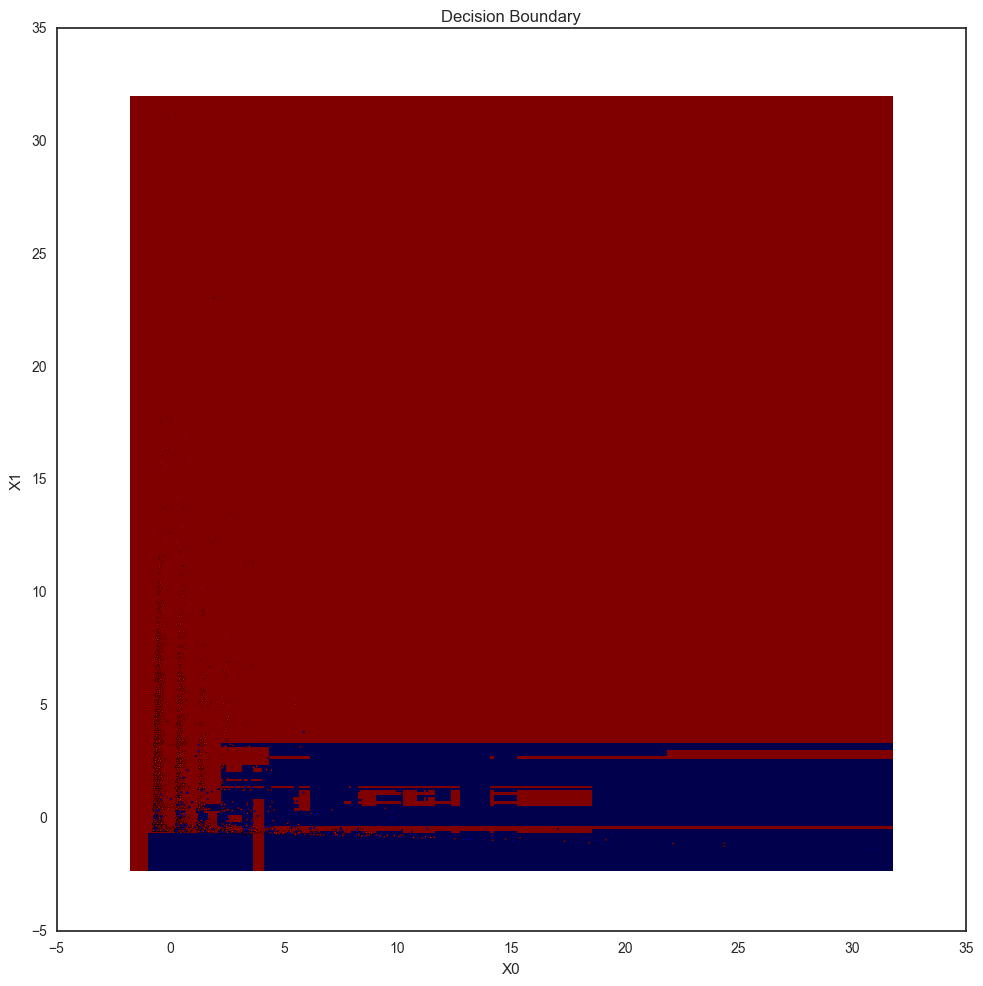

In [81]:
plot_decision_bounderies(None,X_r2)

In [75]:
print bdt.score(X_test, y_test)

0.740330754868
